In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 8)
np.random.seed(0)

## Task 1: Acquire, preprocess, and analyze the data


In [ ]:
# fetch wine dataset
from ucimlrepo import fetch_ucirepo

wine = fetch_ucirepo(id=109)
wine_df = pd.concat([wine.data.features, wine.data.targets], axis=1)

# fetch boston housing dataset
name_info={'CRIM':  'per capita crime rate by town',
           'ZN':    'proportion of residential land zoned for lots over 25,000 sq.ft.',
           'INDUS': 'proportion of non-retail business acres per town',
           'CHAS':  'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
           'NOX':   'nitric oxides concentration (parts per 10 million)',
           'RM':    'average number of rooms per dwelling',
           'AGE':   'proportion of owner-occupied units built prior to 1940',
           'DIS':   'weighted distances to five Boston employment centres',
           'RAD':   'index of accessibility to radial highways',
           'TAX':   'full-value property-tax rate per $10,000',
           'PTRATIO': 'pupil-teacher ratio by town',
           'LSTAT': '% lower status of the population',
           'MEDV':  "Median value of owner-occupied homes in $1000's"}

boston_housing_df = pd.read_csv('https://raw.githubusercontent.com/j-c-carr/boston_dataset/master/boston.csv').drop(['B'], axis=1)

ModuleNotFoundError: ignored

In [ ]:
# clean the data
boston_housing_df.dropna(inplace=True)
wine_df.dropna(inplace=True)

print(boston_housing_df.info())
print(wine_df.info())


NameError: ignored

**Summary Statistics for Boston Housing Dataset.**

Summary Statistics for Boston Housing Dataset
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.45

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

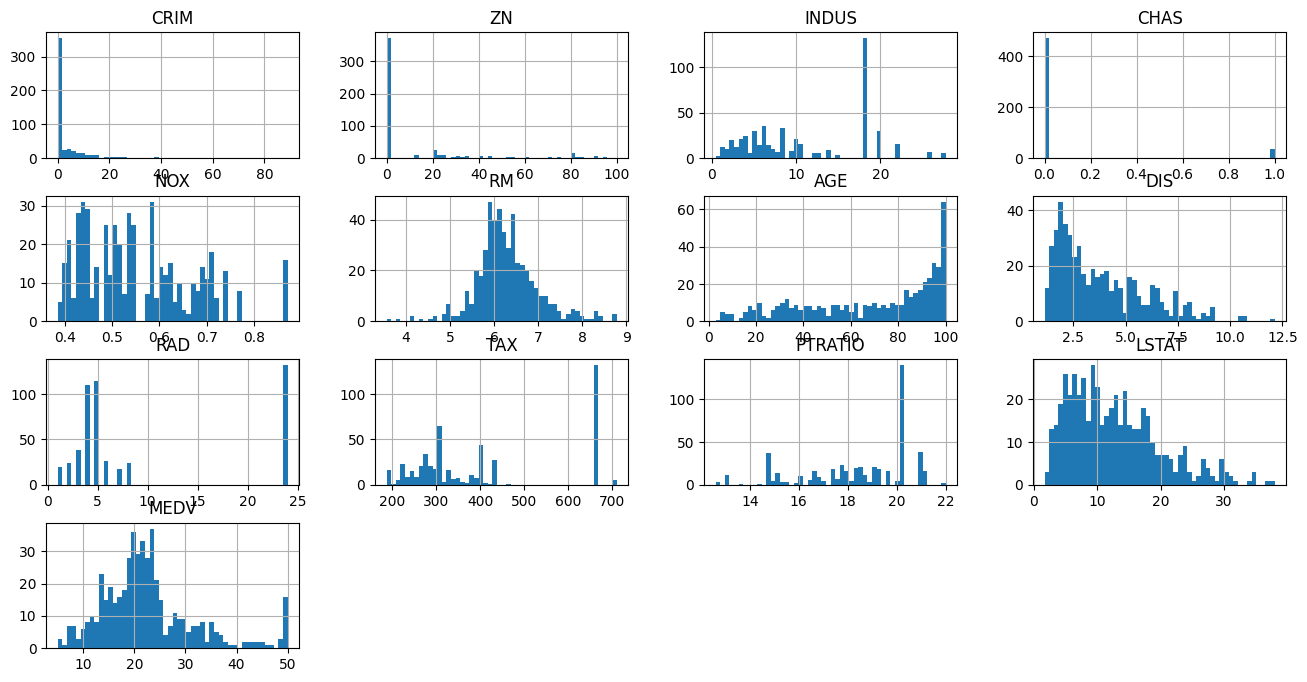

In [ ]:
print("Summary Statistics for Boston Housing Dataset\n", boston_housing_df.describe())
boston_housing_df.hist(bins=50)

**Summary statistics for wine dataset.**

Summary Statistics for Wine Dataset
           Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.12445

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malicacid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity_of_ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': '0D280_0D315_of_diluted_wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

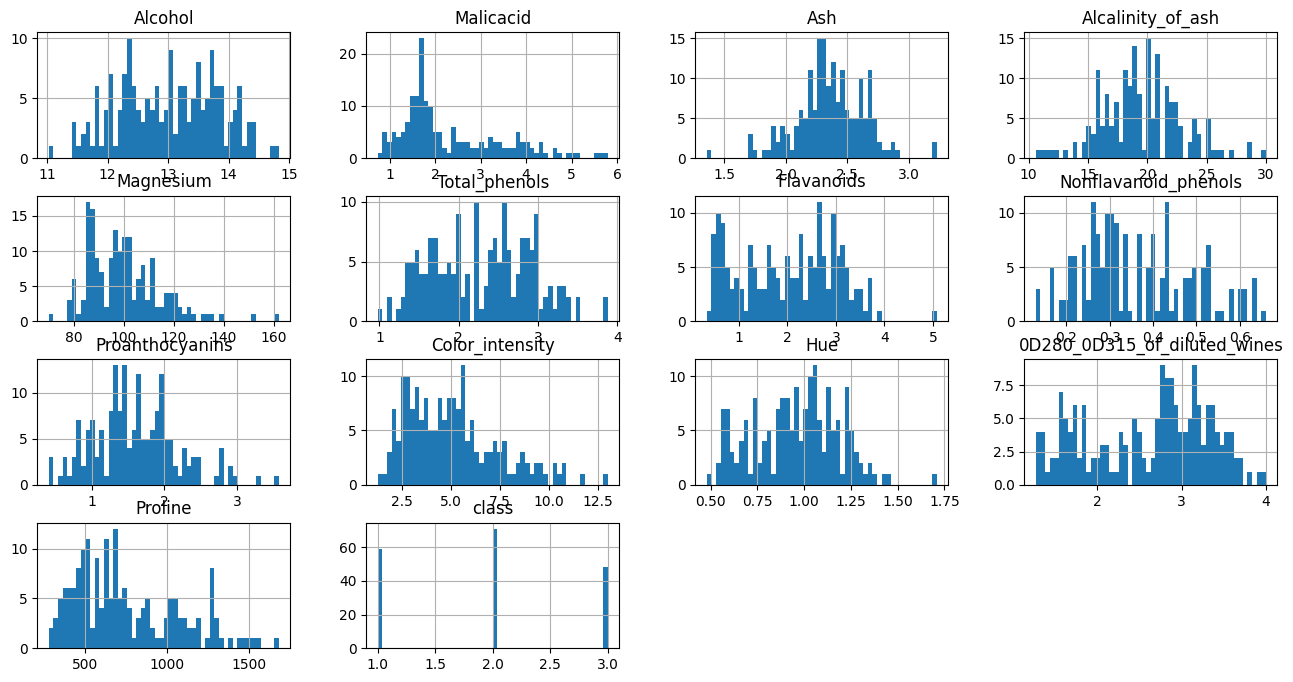

In [ ]:
print("Summary Statistics for Wine Dataset\n", wine_df.describe())
wine_df.hist(bins=50)

## 2. Implement the Methods

### 2.1 Linear Regression

In [ ]:
# data processing for Boston housing dataset
# train-test split
test_size=0.25
boston_housing_df['train'] = np.random.binomial(1, 1-test_size, size=(boston_housing_df.shape[0], 1)).astype(bool)

X_train = boston_housing_df[boston_housing_df.train == True].drop(['MEDV', 'train'], axis=1).to_numpy()
X_test = boston_housing_df[boston_housing_df.train == False].drop(['MEDV', 'train'], axis=1).to_numpy()
y_train = boston_housing_df[boston_housing_df.train == True].MEDV.to_numpy().reshape(-1,1)
y_test = boston_housing_df[boston_housing_df.train == False].MEDV.to_numpy().reshape(-1,1)

In [ ]:
# 2.1 Analytic linear regression

class LinearRegression():
  def __init__(self, add_bias=True):

    self.add_bias = add_bias
    self.w = None

  def fit(self, X, y):
    A = np.copy(X)
    if self.add_bias:
      A = np.concatenate([np.ones((A.shape[0], 1)), A], axis=1)
    # w = (A^T.A)^{-1}.A^T.y
    AAT = np.dot(A.transpose(), A)
    AAT_inv = np.linalg.inv(AAT)
    AAT_inv_AT = np.dot(AAT_inv, A.transpose())
    self.w = np.dot(AAT_inv_AT,y)

  def predict(self, X):
    assert self.w is not None
    A = np.copy(X)
    if self.add_bias:
      A = np.concatenate([np.ones((A.shape[0], 1)), A], axis=1)

    return np.dot(A, self.w)


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

NameError: ignored

### 2.2 Logistic Regression with Gradient Descent

In [ ]:
# train-test split with proportional weighting for each class
test_size=0.25
class_counts = wine_df['class'].value_counts().to_dict()

cls_1 = np.random.binomial(1, 1-test_size, size=(class_counts[1], 1)).astype(bool)
cls_2 = np.random.binomial(1, 1-test_size, size=(class_counts[2], 1)).astype(bool)
cls_3 = np.random.binomial(1, 1-test_size, size=(class_counts[3], 1)).astype(bool)

wine_df.sort_values(by=['class'])['train'] = np.concatenate([cls_1,cls_2,cls_3], axis=0)

# one-hot encode the class labels
one_hot_y = pd.get_dummies(wine_df['class'])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [1]:
def logistic_gradient(X, y, w):
  y_preds = logistic(np.dot(X, w))
  grad = np.dot(X.T, y_preds-y) / X.shape[0]
  return grad

In [ ]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
      self.add_bias = add_bias
      self.learning_rate = learning_rate
      self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
      self.max_iters = max_iters                    #maximum number of iteration of gradient descent
      self.verbose = verbose

    def fit(self, X, y):
      A = np.copy(X)
      if self.add_bias:
        A = np.concatenate([np.ones((A.shape[0], 1)), A], axis=1)

      self.w = np.zeros((A.shape[1],1))
      g = np.inf
      t = 0
      # the code snippet below is for gradient descent
      while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
          g = self.gradient(A, y)
          self.w = self.w - self.learning_rate * g
          t += 1

      if self.verbose:
          print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
          print(f'the weight found: {self.w}')

      return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with g

{3: 48, 1: 59, 2: 71}